In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
from urllib.parse import urlparse
import spacy

import warnings
warnings.filterwarnings('ignore')

In [43]:
df = pd.read_csv('../datasets/comics_reddit.csv')
df.head()

,title,post,subreddit,up_votes,up_vote_ratio
0,Weekly Discussion Thread: ...,Hey there honorary Justice...,DCcomics,16,0.84
1,Dead Boy Detectives Megath...,# [***Dead Boy Detectives*...,DCcomics,12,0.80
2,[Comic Excerpt] Tim realiz...,NaN,DCcomics,470,0.96
3,[Comic Excerpt] Bros reall...,NaN,DCcomics,65,0.90
4,[Discussion] It’s Donna Tr...,Artist: https://www.tumblr...,DCcomics,132,0.99


In [44]:
df.shape

(2891, 5)

In [45]:
### Dropping initial Duplicates reduces Data Frame from 2,891 posts to 2,526 posts

In [46]:
df.drop_duplicates(inplace = True)

In [47]:
df.shape

(2526, 5)

Removing duplicate posts reduces the dataframe from 2,891 records to 2,526 records

In [48]:
df['subreddit'].value_counts()

subreddit
DCcomics    1290
Marvel      1236
Name: count, dtype: int64

In [49]:
df['subreddit'].value_counts(normalize = True)

subreddit
DCcomics    0.510689
Marvel      0.489311
Name: proportion, dtype: float64

### Making everything lower case

In [50]:
df['title'] = df['title'].str.lower()
df['post'] = df['post'].str.lower()

In [51]:
df.head()

,title,post,subreddit,up_votes,up_vote_ratio
0,weekly discussion thread: ...,hey there honorary justice...,DCcomics,16,0.84
1,dead boy detectives megath...,# [***dead boy detectives*...,DCcomics,12,0.80
2,[comic excerpt] tim realiz...,NaN,DCcomics,470,0.96
3,[comic excerpt] bros reall...,NaN,DCcomics,65,0.90
4,[discussion] it’s donna tr...,artist: https://www.tumblr...,DCcomics,132,0.99


### Removing URLs from title and post

In [52]:
#Where ]( are together create a space so I can find each URL
df['post'] = df['post'].str.replace('](', '] (')
df['title'] = df['title'].str.replace('](', '] (')

In [53]:
df.head()

,title,post,subreddit,up_votes,up_vote_ratio
0,weekly discussion thread: ...,hey there honorary justice...,DCcomics,16,0.84
1,dead boy detectives megath...,# [***dead boy detectives*...,DCcomics,12,0.80
2,[comic excerpt] tim realiz...,NaN,DCcomics,470,0.96
3,[comic excerpt] bros reall...,NaN,DCcomics,65,0.90
4,[discussion] it’s donna tr...,artist: https://www.tumblr...,DCcomics,132,0.99


In [54]:
def remove_urls(texts):
    nlp = spacy.load('en_core_web_md') #Calling Spacy object in beginning of function
    list_of_new_posts = [] #Empty list of new posts
    
    for i in texts.index:
        text = texts[i]

        if pd.notnull(text):
            non_url_words = []
            text2 = nlp(text)
        
            for token in text2:
                if not token.like_url and not token.is_punct and not token.text == "n't":
                    #If it's not a URL, punctuation or "n't" (since not is a stop word), append it to the empty list of non-url-words
                    non_url_words.append(token.text)
            
            non_url_words

            new_post = ' '.join(x for x in non_url_words)
            list_of_new_posts.append(new_post)

        #If it is null, append an empty string to the list
        else:
            list_of_new_posts.append('')
        
    return list_of_new_posts
        #' '.join(x for x in non_url_words) #Take the empty list of not_url_words and join them with spaces

In [55]:
df['clean_title'] = remove_urls(df['title'])
df['clean_post'] = remove_urls(df['post'])

In [56]:
df.head()

,title,post,subreddit,up_votes,up_vote_ratio,clean_title,clean_post
0,weekly discussion thread: ...,hey there honorary justice...,DCcomics,16,0.84,weekly discussion thread c...,hey there honorary justice...
1,dead boy detectives megath...,# [***dead boy detectives*...,DCcomics,12,0.80,dead boy detectives megath...,dead boy detectives \n\n t...
2,[comic excerpt] tim realiz...,NaN,DCcomics,470,0.96,comic excerpt tim realizes...,
3,[comic excerpt] bros reall...,NaN,DCcomics,65,0.90,comic excerpt bros really ...,
4,[discussion] it’s donna tr...,artist: https://www.tumblr...,DCcomics,132,0.99,discussion it ’s donna tro...,artist


### Create a column that combines title and post

In [57]:
# Added in the fillna with a blank string, because otherwise adding a string + NaN results in a NaN
df['clean_text'] = df['clean_title'].fillna('') + ' ' + df['clean_post'].fillna('')
df[['clean_title', 'clean_post', 'clean_text']].head()

,clean_title,clean_post,clean_text
0,weekly discussion thread c...,hey there honorary justice...,weekly discussion thread c...
1,dead boy detectives megath...,dead boy detectives \n\n t...,dead boy detectives megath...
2,comic excerpt tim realizes...,,comic excerpt tim realizes...
3,comic excerpt bros really ...,,comic excerpt bros really ...
4,discussion it ’s donna tro...,artist,discussion it ’s donna tro...


### Adding length of titles and posts based on initial title / post length

In [58]:
df.head()

,title,post,subreddit,up_votes,up_vote_ratio,clean_title,clean_post,clean_text
0,weekly discussion thread: ...,hey there honorary justice...,DCcomics,16,0.84,weekly discussion thread c...,hey there honorary justice...,weekly discussion thread c...
1,dead boy detectives megath...,# [***dead boy detectives*...,DCcomics,12,0.80,dead boy detectives megath...,dead boy detectives \n\n t...,dead boy detectives megath...
2,[comic excerpt] tim realiz...,NaN,DCcomics,470,0.96,comic excerpt tim realizes...,,comic excerpt tim realizes...
3,[comic excerpt] bros reall...,NaN,DCcomics,65,0.90,comic excerpt bros really ...,,comic excerpt bros really ...
4,[discussion] it’s donna tr...,artist: https://www.tumblr...,DCcomics,132,0.99,discussion it ’s donna tro...,artist,discussion it ’s donna tro...


In [59]:
#When I get the unique text, there's 1,675 rows
len(set(df['clean_text']))

1675

### Identifying more duplicates

The posts look identical, but have different number of up_votes and up_vote ratio.

(Figured this out after analysis when some posts were showing up twice in mis-categorized posts)

In [60]:
#Identifying more duplicates - the posts look identical, but have different number of up_votes and up_vote ratio

pd.set_option('max_colwidth', 400) #https://stackoverflow.com/questions/39680147/can-i-set-variable-column-widths-in-pandas

duplicates = df.duplicated(subset=['clean_text'], keep = False)
duplicates_df = df[duplicates]
duplicates_df[['subreddit', 'up_votes', 'up_vote_ratio', 'clean_text']].sort_values('clean_text')

,subreddit,up_votes,up_vote_ratio,clean_text
715,DCcomics,5,0.65,\n josh keaton 's web warriors 🕸 ️ \n \n\n
315,DCcomics,3,0.59,\n josh keaton 's web warriors 🕸 ️ \n \n\n
1905,Marvel,4,0.70,best dr doom issues to read wanna get to know him a little more and curious
2305,Marvel,4,0.75,best dr doom issues to read wanna get to know him a little more and curious
731,DCcomics,7,0.89,/r dccomics moderator applications 2024 hey folks r dccomics is growing faster than ever and we need more moderators to help out and keep this subreddit sane \n\n if you 're interesting in any of the following \n\n moderating the fandom to keep discussions civil and free of bigotry \n\n reshaping rules to best serve the community \n coordinating subreddit activities and discussions \n reaching...
...,...,...,...,...
2232,Marvel,0,0.40,youtube has become toxic xmen are woke all this x men is woke comes from the youtube nutters who make their money selling hate they dog whistle everything from african americans to homosexuals they are petty red pill incels if you look into their backgrounds almost all of them are rejects who were turned down because their writing or art were up to snuff \n\n the x men have been woke from day ...
955,DCcomics,0,0.30,youtube lore channel about dc characters hi i m looking for a youtube channel that have lore about the different version of the characters in the comics something like a deep introspection like the joker and other tormented villains i m not afraid of long 2 + hours videos either
555,DCcomics,0,0.22,youtube lore channel about dc characters hi i m looking for a youtube channel that have lore about the different version of the characters in the comics something like a deep introspection like the joker and other tormented villains i m not afraid of long 2 + hours videos either
1457,Marvel,128,0.88,💫 galacta here with a totally cosmic announcement coming your way \n\n the closed alpha test is kicking off on may 10th \n\n an amazing lineup of heroes awaits including spider man hulk and more


In [61]:
pd.set_option('max_colwidth', 30)

df.drop_duplicates(subset = ['clean_text'], inplace = True)
print(df.shape)
df

(1675, 8)


,title,post,subreddit,up_votes,up_vote_ratio,clean_title,clean_post,clean_text
0,weekly discussion thread: ...,hey there honorary justice...,DCcomics,16,0.84,weekly discussion thread c...,hey there honorary justice...,weekly discussion thread c...
1,dead boy detectives megath...,# [***dead boy detectives*...,DCcomics,12,0.80,dead boy detectives megath...,dead boy detectives \n\n t...,dead boy detectives megath...
2,[comic excerpt] tim realiz...,NaN,DCcomics,470,0.96,comic excerpt tim realizes...,,comic excerpt tim realizes...
3,[comic excerpt] bros reall...,NaN,DCcomics,65,0.90,comic excerpt bros really ...,,comic excerpt bros really ...
4,[discussion] it’s donna tr...,artist: https://www.tumblr...,DCcomics,132,0.99,discussion it ’s donna tro...,artist,discussion it ’s donna tro...
...,...,...,...,...,...,...,...,...
2784,what do you think about th...,basically what i mean by t...,Marvel,0,0.37,what do you think about th...,basically what i mean by t...,what do you think about th...
2785,are these good?,i know they arent comics b...,Marvel,9,0.91,are these good,i know they are nt comics ...,are these good i know they...
2786,“and then i just remember ...,NaN,Marvel,10,0.82,and then i just remember t...,,and then i just remember t...
2787,why wasn't secret invasion...,NaN,Marvel,0,0.09,why was secret invasion ma...,,why was secret invasion ma...


In [62]:
# Calculating the character length of titles and posts

In [63]:
df['title_length'] = df['title'].str.len()
df['post_length'] = df['post'].str.len()

In [64]:
df.head()

,title,post,subreddit,up_votes,up_vote_ratio,clean_title,clean_post,clean_text,title_length,post_length
0,weekly discussion thread: ...,hey there honorary justice...,DCcomics,16,0.84,weekly discussion thread c...,hey there honorary justice...,weekly discussion thread c...,98,4827.0
1,dead boy detectives megath...,# [***dead boy detectives*...,DCcomics,12,0.80,dead boy detectives megath...,dead boy detectives \n\n t...,dead boy detectives megath...,30,1957.0
2,[comic excerpt] tim realiz...,NaN,DCcomics,470,0.96,comic excerpt tim realizes...,,comic excerpt tim realizes...,80,NaN
3,[comic excerpt] bros reall...,NaN,DCcomics,65,0.90,comic excerpt bros really ...,,comic excerpt bros really ...,119,NaN
4,[discussion] it’s donna tr...,artist: https://www.tumblr...,DCcomics,132,0.99,discussion it ’s donna tro...,artist,discussion it ’s donna tro...,69,86.0


In [65]:
# get the number of words in title : https://stackoverflow.com/questions/46429033/how-do-i-count-the-total-number-of-words-in-a-pandas-dataframe-cell-and-add-thos
df['title_word_count'] = df['title'].str.count(' ') + 1
df.head()

,title,post,subreddit,up_votes,up_vote_ratio,clean_title,clean_post,clean_text,title_length,post_length,title_word_count
0,weekly discussion thread: ...,hey there honorary justice...,DCcomics,16,0.84,weekly discussion thread c...,hey there honorary justice...,weekly discussion thread c...,98,4827.0,17
1,dead boy detectives megath...,# [***dead boy detectives*...,DCcomics,12,0.80,dead boy detectives megath...,dead boy detectives \n\n t...,dead boy detectives megath...,30,1957.0,4
2,[comic excerpt] tim realiz...,NaN,DCcomics,470,0.96,comic excerpt tim realizes...,,comic excerpt tim realizes...,80,NaN,13
3,[comic excerpt] bros reall...,NaN,DCcomics,65,0.90,comic excerpt bros really ...,,comic excerpt bros really ...,119,NaN,20
4,[discussion] it’s donna tr...,artist: https://www.tumblr...,DCcomics,132,0.99,discussion it ’s donna tro...,artist,discussion it ’s donna tro...,69,86.0,10


In [66]:
# Get the number of words in the posts
df['post_word_count'] = df['post'].str.count(' ') +1
df.head()

,title,post,subreddit,up_votes,up_vote_ratio,clean_title,clean_post,clean_text,title_length,post_length,title_word_count,post_word_count
0,weekly discussion thread: ...,hey there honorary justice...,DCcomics,16,0.84,weekly discussion thread c...,hey there honorary justice...,weekly discussion thread c...,98,4827.0,17,355.0
1,dead boy detectives megath...,# [***dead boy detectives*...,DCcomics,12,0.80,dead boy detectives megath...,dead boy detectives \n\n t...,dead boy detectives megath...,30,1957.0,4,132.0
2,[comic excerpt] tim realiz...,NaN,DCcomics,470,0.96,comic excerpt tim realizes...,,comic excerpt tim realizes...,80,NaN,13,NaN
3,[comic excerpt] bros reall...,NaN,DCcomics,65,0.90,comic excerpt bros really ...,,comic excerpt bros really ...,119,NaN,20,NaN
4,[discussion] it’s donna tr...,artist: https://www.tumblr...,DCcomics,132,0.99,discussion it ’s donna tro...,artist,discussion it ’s donna tro...,69,86.0,10,2.0


### Nearly half of the posts do not have any words (just links, videos, images)

In [67]:
df.isnull().sum()

title                 0
post                834
subreddit             0
up_votes              0
up_vote_ratio         0
clean_title           0
clean_post            0
clean_text            0
title_length          0
post_length         834
title_word_count      0
post_word_count     834
dtype: int64

In [68]:
df.isnull().mean()

title               0.00000
post                0.49791
subreddit           0.00000
up_votes            0.00000
up_vote_ratio       0.00000
clean_title         0.00000
clean_post          0.00000
clean_text          0.00000
title_length        0.00000
post_length         0.49791
title_word_count    0.00000
post_word_count     0.49791
dtype: float64

In [69]:
df['post_length'].fillna(0, inplace = True)
df['post_word_count'].fillna(0, inplace = True)
df.head()

,title,post,subreddit,up_votes,up_vote_ratio,clean_title,clean_post,clean_text,title_length,post_length,title_word_count,post_word_count
0,weekly discussion thread: ...,hey there honorary justice...,DCcomics,16,0.84,weekly discussion thread c...,hey there honorary justice...,weekly discussion thread c...,98,4827.0,17,355.0
1,dead boy detectives megath...,# [***dead boy detectives*...,DCcomics,12,0.80,dead boy detectives megath...,dead boy detectives \n\n t...,dead boy detectives megath...,30,1957.0,4,132.0
2,[comic excerpt] tim realiz...,NaN,DCcomics,470,0.96,comic excerpt tim realizes...,,comic excerpt tim realizes...,80,0.0,13,0.0
3,[comic excerpt] bros reall...,NaN,DCcomics,65,0.90,comic excerpt bros really ...,,comic excerpt bros really ...,119,0.0,20,0.0
4,[discussion] it’s donna tr...,artist: https://www.tumblr...,DCcomics,132,0.99,discussion it ’s donna tro...,artist,discussion it ’s donna tro...,69,86.0,10,2.0


In [70]:
df.isnull().sum()

title                 0
post                834
subreddit             0
up_votes              0
up_vote_ratio         0
clean_title           0
clean_post            0
clean_text            0
title_length          0
post_length           0
title_word_count      0
post_word_count       0
dtype: int64

### Create a dummy column for does this post have text or not

In [71]:
df['post_has_text'] = np.where(df['post_word_count'] == 0, 0, 1)
df.head()

,title,post,subreddit,up_votes,up_vote_ratio,clean_title,clean_post,clean_text,title_length,post_length,title_word_count,post_word_count,post_has_text
0,weekly discussion thread: ...,hey there honorary justice...,DCcomics,16,0.84,weekly discussion thread c...,hey there honorary justice...,weekly discussion thread c...,98,4827.0,17,355.0,1
1,dead boy detectives megath...,# [***dead boy detectives*...,DCcomics,12,0.80,dead boy detectives megath...,dead boy detectives \n\n t...,dead boy detectives megath...,30,1957.0,4,132.0,1
2,[comic excerpt] tim realiz...,NaN,DCcomics,470,0.96,comic excerpt tim realizes...,,comic excerpt tim realizes...,80,0.0,13,0.0,0
3,[comic excerpt] bros reall...,NaN,DCcomics,65,0.90,comic excerpt bros really ...,,comic excerpt bros really ...,119,0.0,20,0.0,0
4,[discussion] it’s donna tr...,artist: https://www.tumblr...,DCcomics,132,0.99,discussion it ’s donna tro...,artist,discussion it ’s donna tro...,69,86.0,10,2.0,1


In [72]:
df.describe()

,up_votes,up_vote_ratio,title_length,post_length,title_word_count,post_word_count,post_has_text
count,1675.000000,1675.000000,1675.000000,1675.000000,1675.000000,1675.000000,1675.000000
mean,131.435821,0.731152,61.106866,261.773134,10.614925,42.888955,0.502090
std,565.883136,0.239486,41.258429,954.283914,7.381021,147.642035,0.500145
min,0.000000,0.060000,5.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,0.560000,33.000000,0.000000,6.000000,0.000000,0.000000
50%,8.000000,0.810000,51.000000,12.000000,9.000000,1.000000,1.000000
75%,57.500000,0.940000,76.000000,256.500000,13.000000,45.000000,1.000000
max,9240.000000,1.000000,300.000000,23210.000000,55.000000,3767.000000,1.000000


In [73]:
# The mean and median title and post word count
df.groupby('subreddit')[['title_word_count', 'post_word_count']].agg(['mean', 'median']).reset_index()

subreddit title_word_count        post_word_count       
                        mean median            mean median
0  DCcomics        10.719194    9.0       51.951422   11.0
1    Marvel        10.509025    9.0       33.684717    0.0

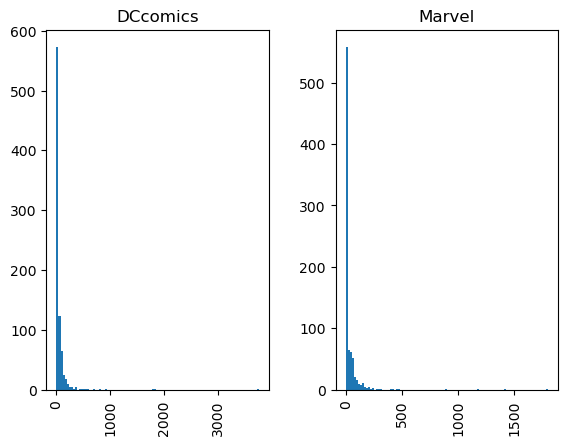

In [74]:
df.hist('post_word_count', by = 'subreddit', bins = 100);

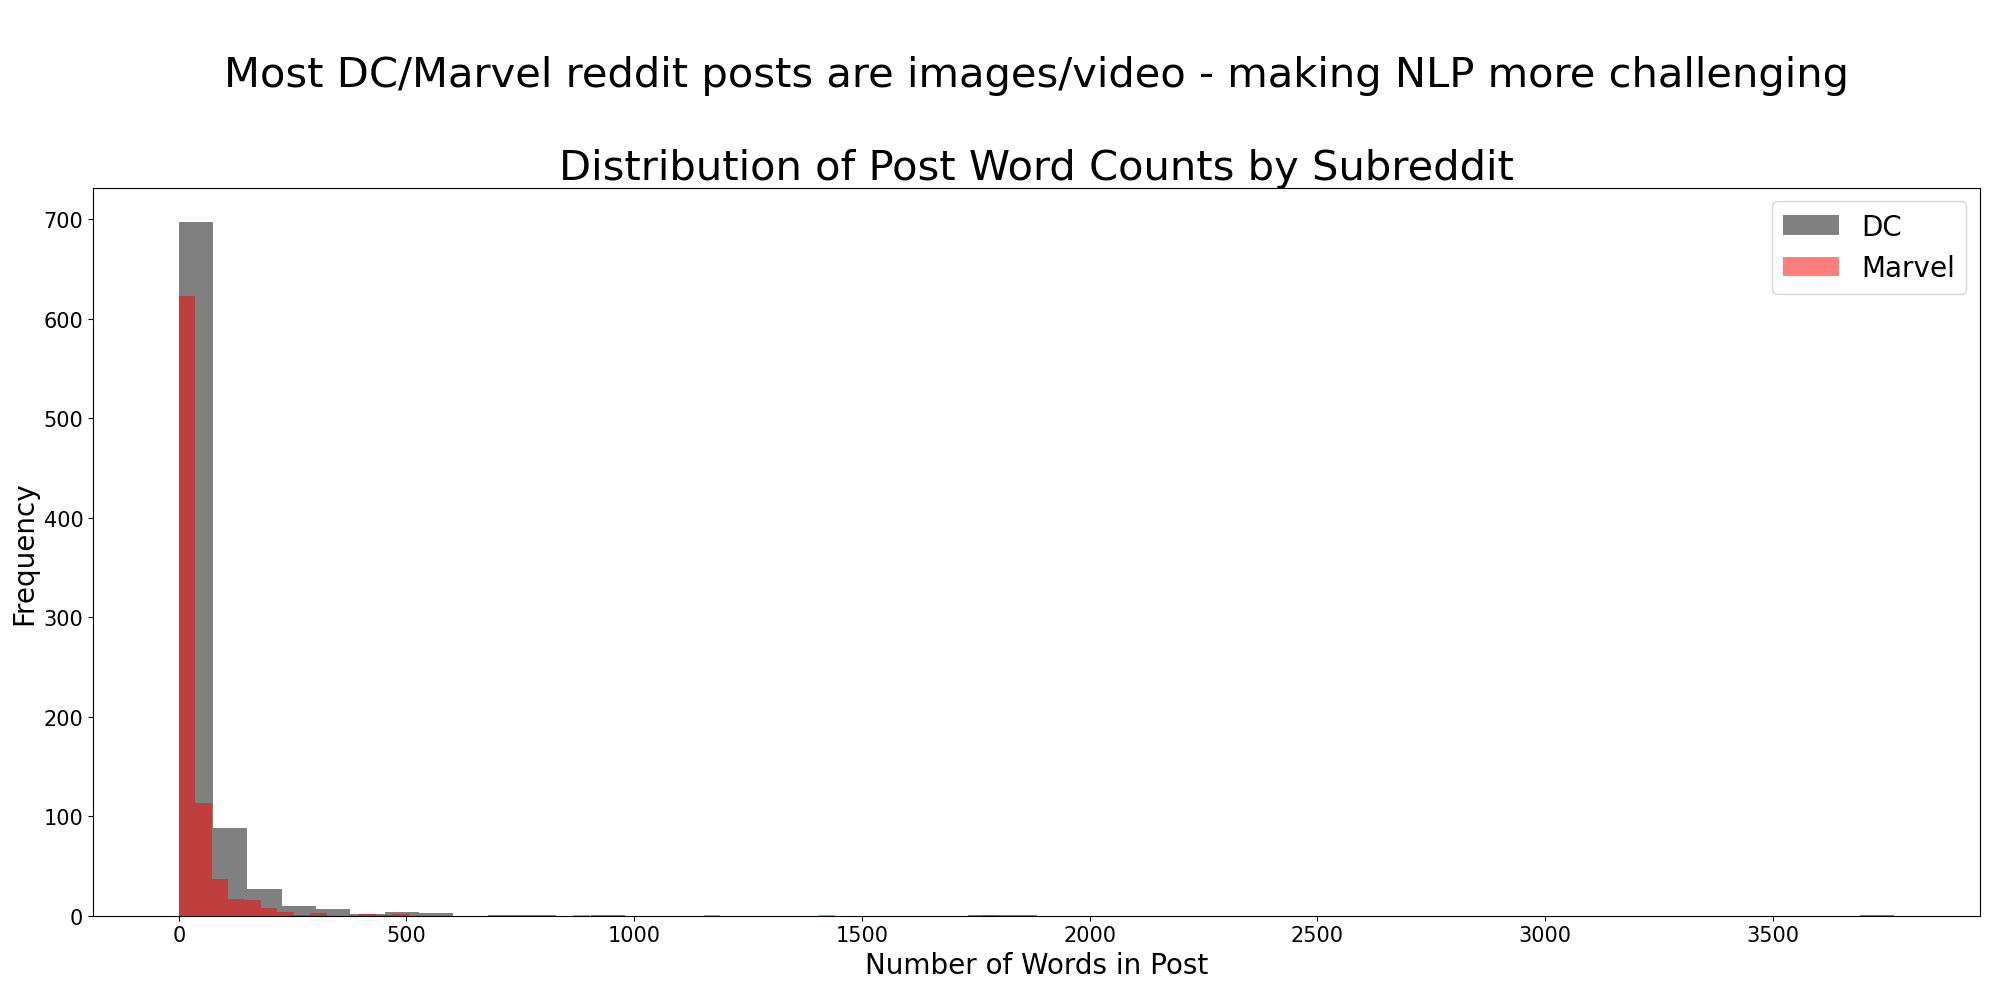

In [75]:
plt.figure(figsize = (20,10))

dc_word_count = pd.DataFrame(df[df['subreddit'] == 'DCcomics']['post_word_count'])
marvel_word_count = pd.DataFrame(df[df['subreddit'] == 'Marvel']['post_word_count'])

plt.hist(dc_word_count['post_word_count'], color = 'grey', label = 'DC', bins = 50)
plt.hist(marvel_word_count['post_word_count'], color = 'red', label = 'Marvel', bins = 50, alpha = 0.5)

plt.title('\nMost DC/Marvel reddit posts are images/video - making NLP more challenging\n\nDistribution of Post Word Counts by Subreddit', size = 30)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel('Number of Words in Post', size = 20)
plt.ylabel('Frequency', size = 20)

plt.legend(fontsize = 20)
plt.tight_layout()

plt.savefig('../images/post_word_counts_by_subreddit.png', dpi = 192);

#### Looking at what percentage of DC posts have 0 words

In [76]:
dc_word_freq = dc_word_count['post_word_count'].value_counts()
dc_word_percent = dc_word_freq / len(dc_word_count)
dc_word_freq_df = pd.DataFrame( {'Frequency' : dc_word_freq, 'Percentage' : dc_word_percent} )
dc_word_freq_df = dc_word_freq_df.reset_index().sort_values('post_word_count')
dc_word_freq_df

,post_word_count,Frequency,Percentage
0,0.0,379,0.449052
3,1.0,9,0.010664
92,2.0,2,0.002370
2,3.0,9,0.010664
76,4.0,2,0.002370
...,...,...,...
120,798.0,1,0.001185
107,940.0,1,0.001185
166,1801.0,1,0.001185
126,1818.0,1,0.001185


#### Looking at what percentage of Marvel posts have 0 words

In [77]:
marvel_word_freq = marvel_word_count['post_word_count'].value_counts()
marvel_word_percent = marvel_word_freq / len(marvel_word_count)
marvel_word_freq_df = pd.DataFrame( {'Frequency' : marvel_word_freq, 'Percentage' : marvel_word_percent} )
marvel_word_freq_df = marvel_word_freq_df.reset_index().sort_values('post_word_count')
marvel_word_freq_df

,post_word_count,Frequency,Percentage
0,0.0,455,0.547533
26,1.0,5,0.006017
11,2.0,6,0.007220
45,3.0,3,0.003610
2,4.0,8,0.009627
...,...,...,...
94,472.0,1,0.001203
135,891.0,1,0.001203
102,1177.0,1,0.001203
99,1419.0,1,0.001203


(-10.0, 100.0)

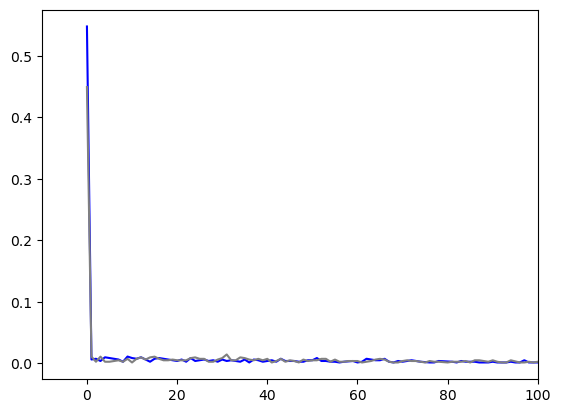

In [78]:
# Plotting the percentage of words against number of words by subreddit
# not that different than histogram, no need

plt.plot(marvel_word_freq_df['post_word_count'],
         marvel_word_freq_df['Percentage'],
         color = 'blue')

plt.plot(dc_word_freq_df['post_word_count'],
         dc_word_freq_df['Percentage'],
         color = 'grey');

plt.xlim([-10, 100])


In [79]:
df.groupby('subreddit').describe().T

subreddit                   DCcomics        Marvel
up_votes         count    844.000000    831.000000
                 mean      66.607820    197.277978
                 std      163.837300    781.006884
                 min        0.000000      0.000000
                 25%        1.000000      1.000000
                 50%       10.000000      7.000000
                 75%       60.000000     52.000000
                 max     2060.000000   9240.000000
up_vote_ratio    count    844.000000    831.000000
                 mean       0.723021      0.739410
                 std        0.240164      0.238657
                 min        0.080000      0.060000
                 25%        0.540000      0.570000
                 50%        0.800000      0.810000
                 75%        0.940000      0.950000
                 max        1.000000      1.000000
title_length     count    844.000000    831.000000
                 mean      62.496445     59.695548
                 std       38.876862     43.522269
                 min        7.000000      5.000000
                 25%       35.000000     32.000000
                 50%       54.000000     48.000000
                 75%       78.250000     74.000000
                 max      300.000000    299.000000
post_length      count    844.000000    831.000000
                 mean     307.990521    214.832732
                 std     1098.140753    779.420957
                 min        0.000000      0.000000
                 25%        0.000000      0.000000
                 50%       65.500000      0.000000
                 75%      296.500000    221.000000
                 max    23210.000000  11770.000000
title_word_count count    844.000000    831.000000
                 mean      10.719194     10.509025
                 std        6.874269      7.865104
                 min        1.000000      1.000000
                 25%        6.000000      5.000000
                 50%        9.000000      9.000000
                 75%       13.000000     13.000000
                 max       55.000000     55.000000
post_word_count  count    844.000000    831.000000
                 mean      51.951422     33.684717
                 std      177.621778    108.406839
                 min        0.000000      0.000000
                 25%        0.000000      0.000000
                 50%       11.000000      0.000000
                 75%       53.000000     36.500000
                 max     3767.000000   1802.000000
post_has_text    count    844.000000    831.000000
                 mean       0.550948      0.452467
                 std        0.497692      0.498035
                 min        0.000000      0.000000
                 25%        0.000000      0.000000
                 50%        1.000000      0.000000
                 75%        1.000000      1.000000
                 max        1.000000      1.000000

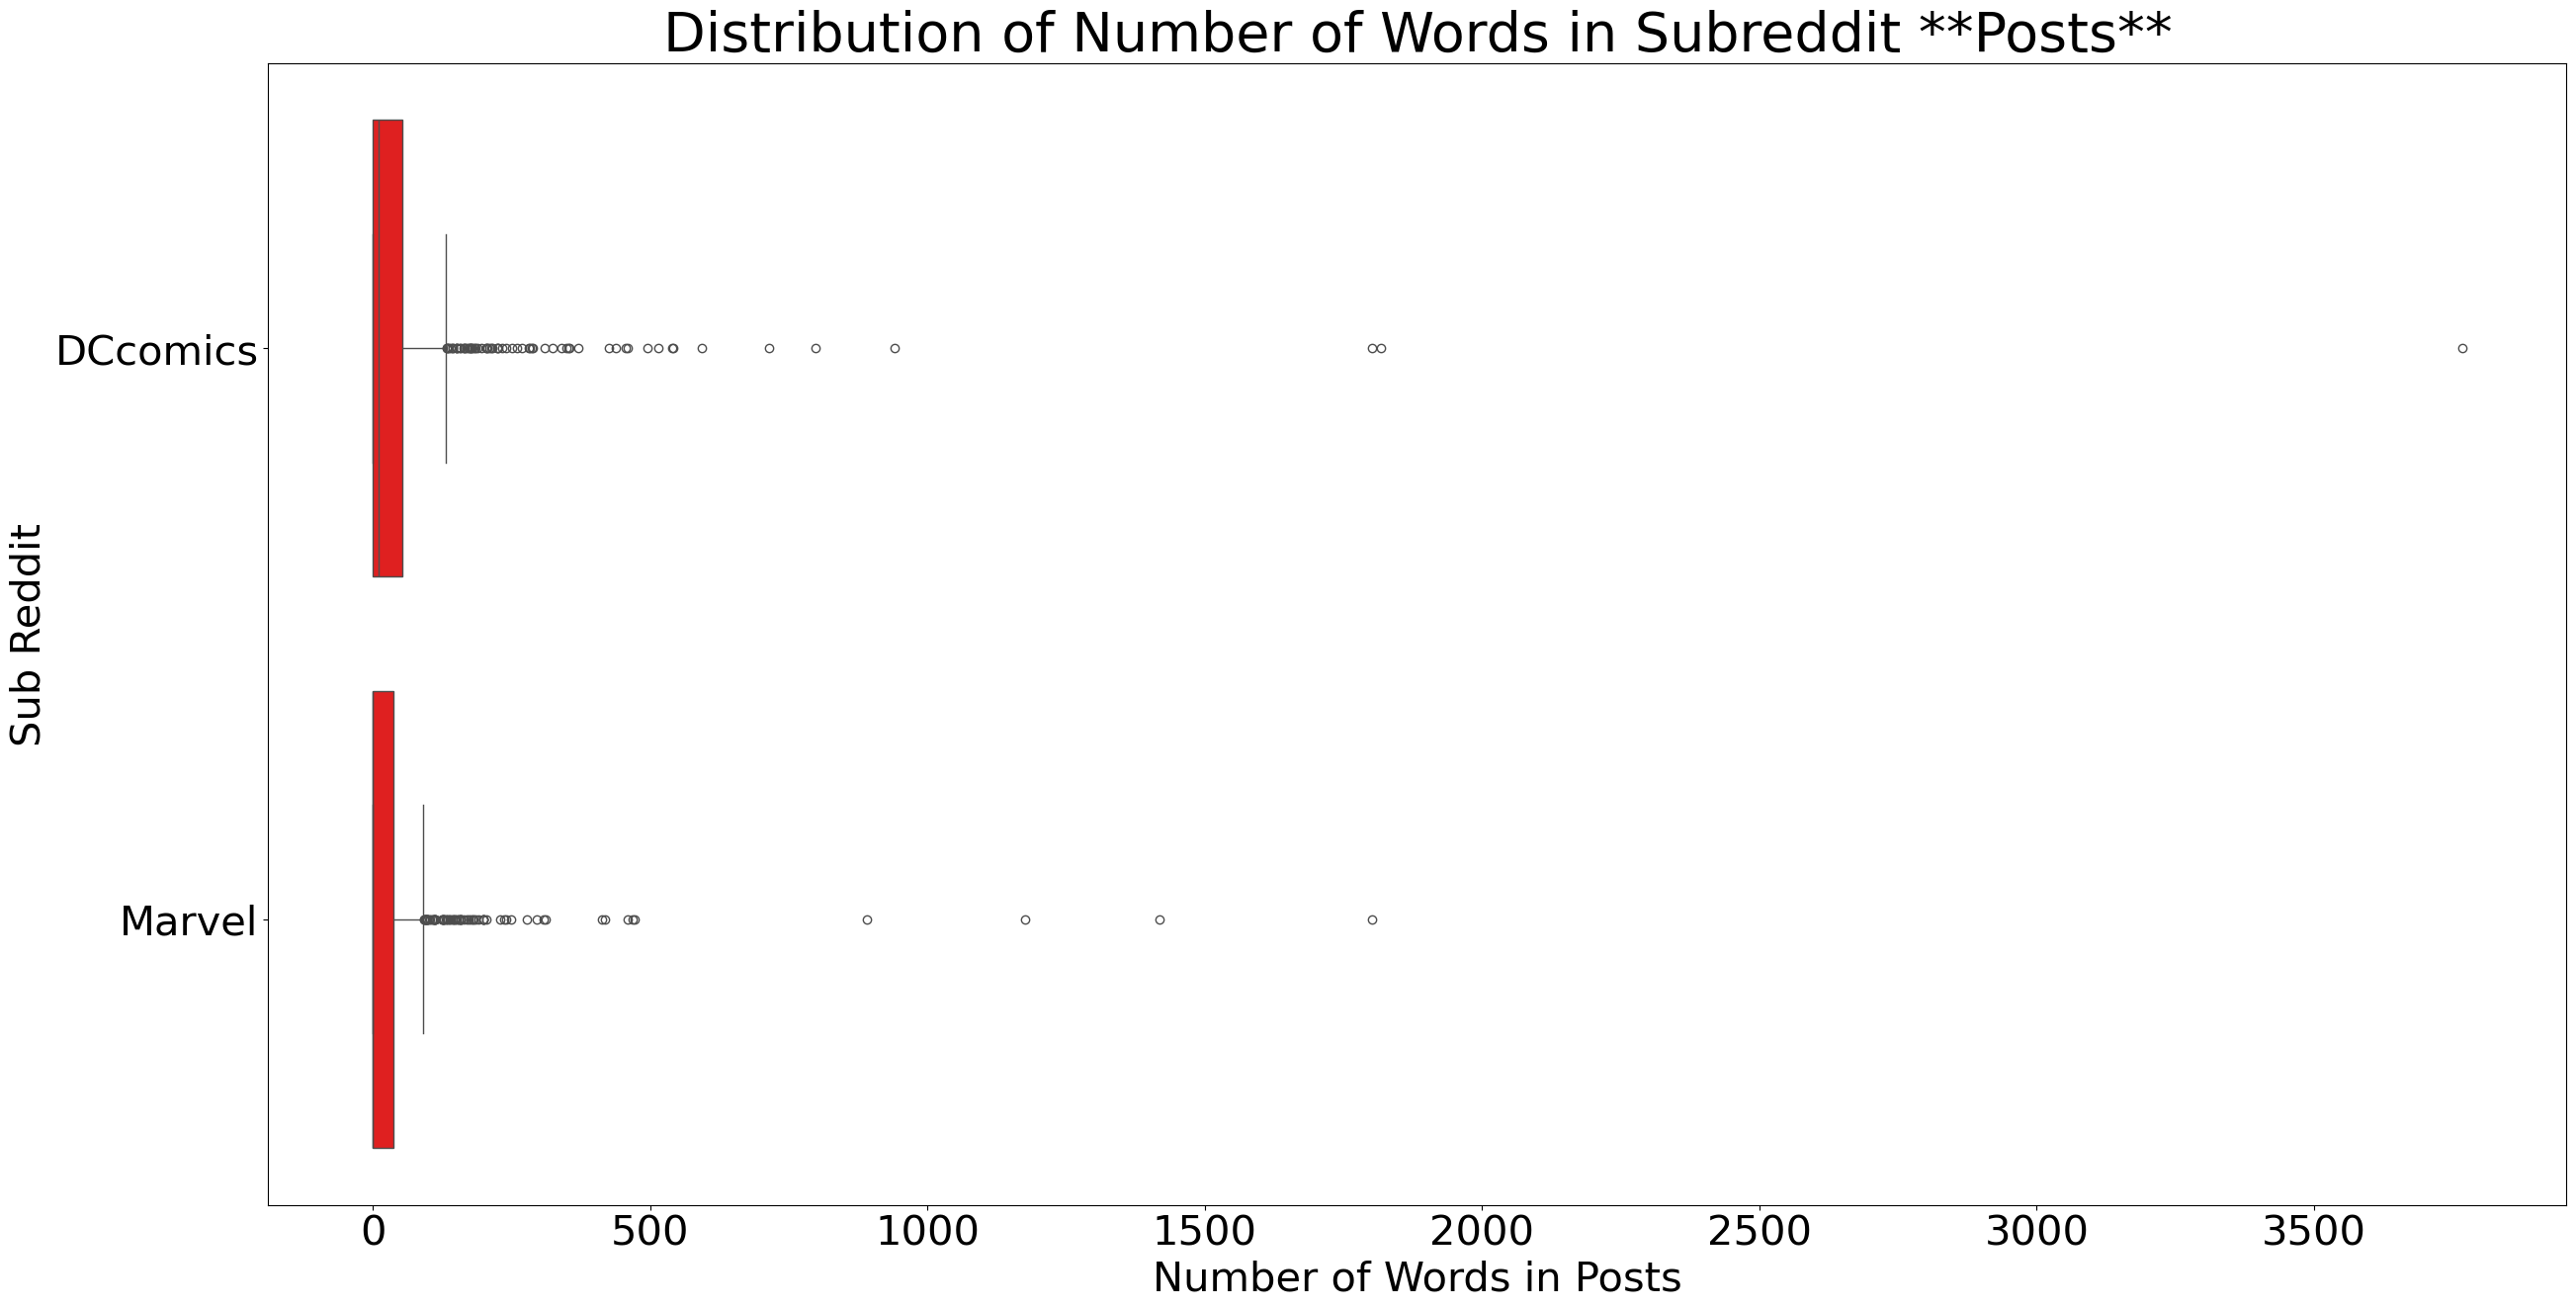

In [80]:
plt.figure(figsize = (30, 15))

sns.boxplot(x = df['post_word_count'],
            y = df['subreddit'], color = 'red')

plt.title('Distribution of Number of Words in Subreddit **Posts**', size = 40)
plt.xticks(size = 30)
plt.yticks(size = 30)
plt.xlabel('Number of Words in Posts', size = 30)
plt.ylabel('Sub Reddit', size = 30);

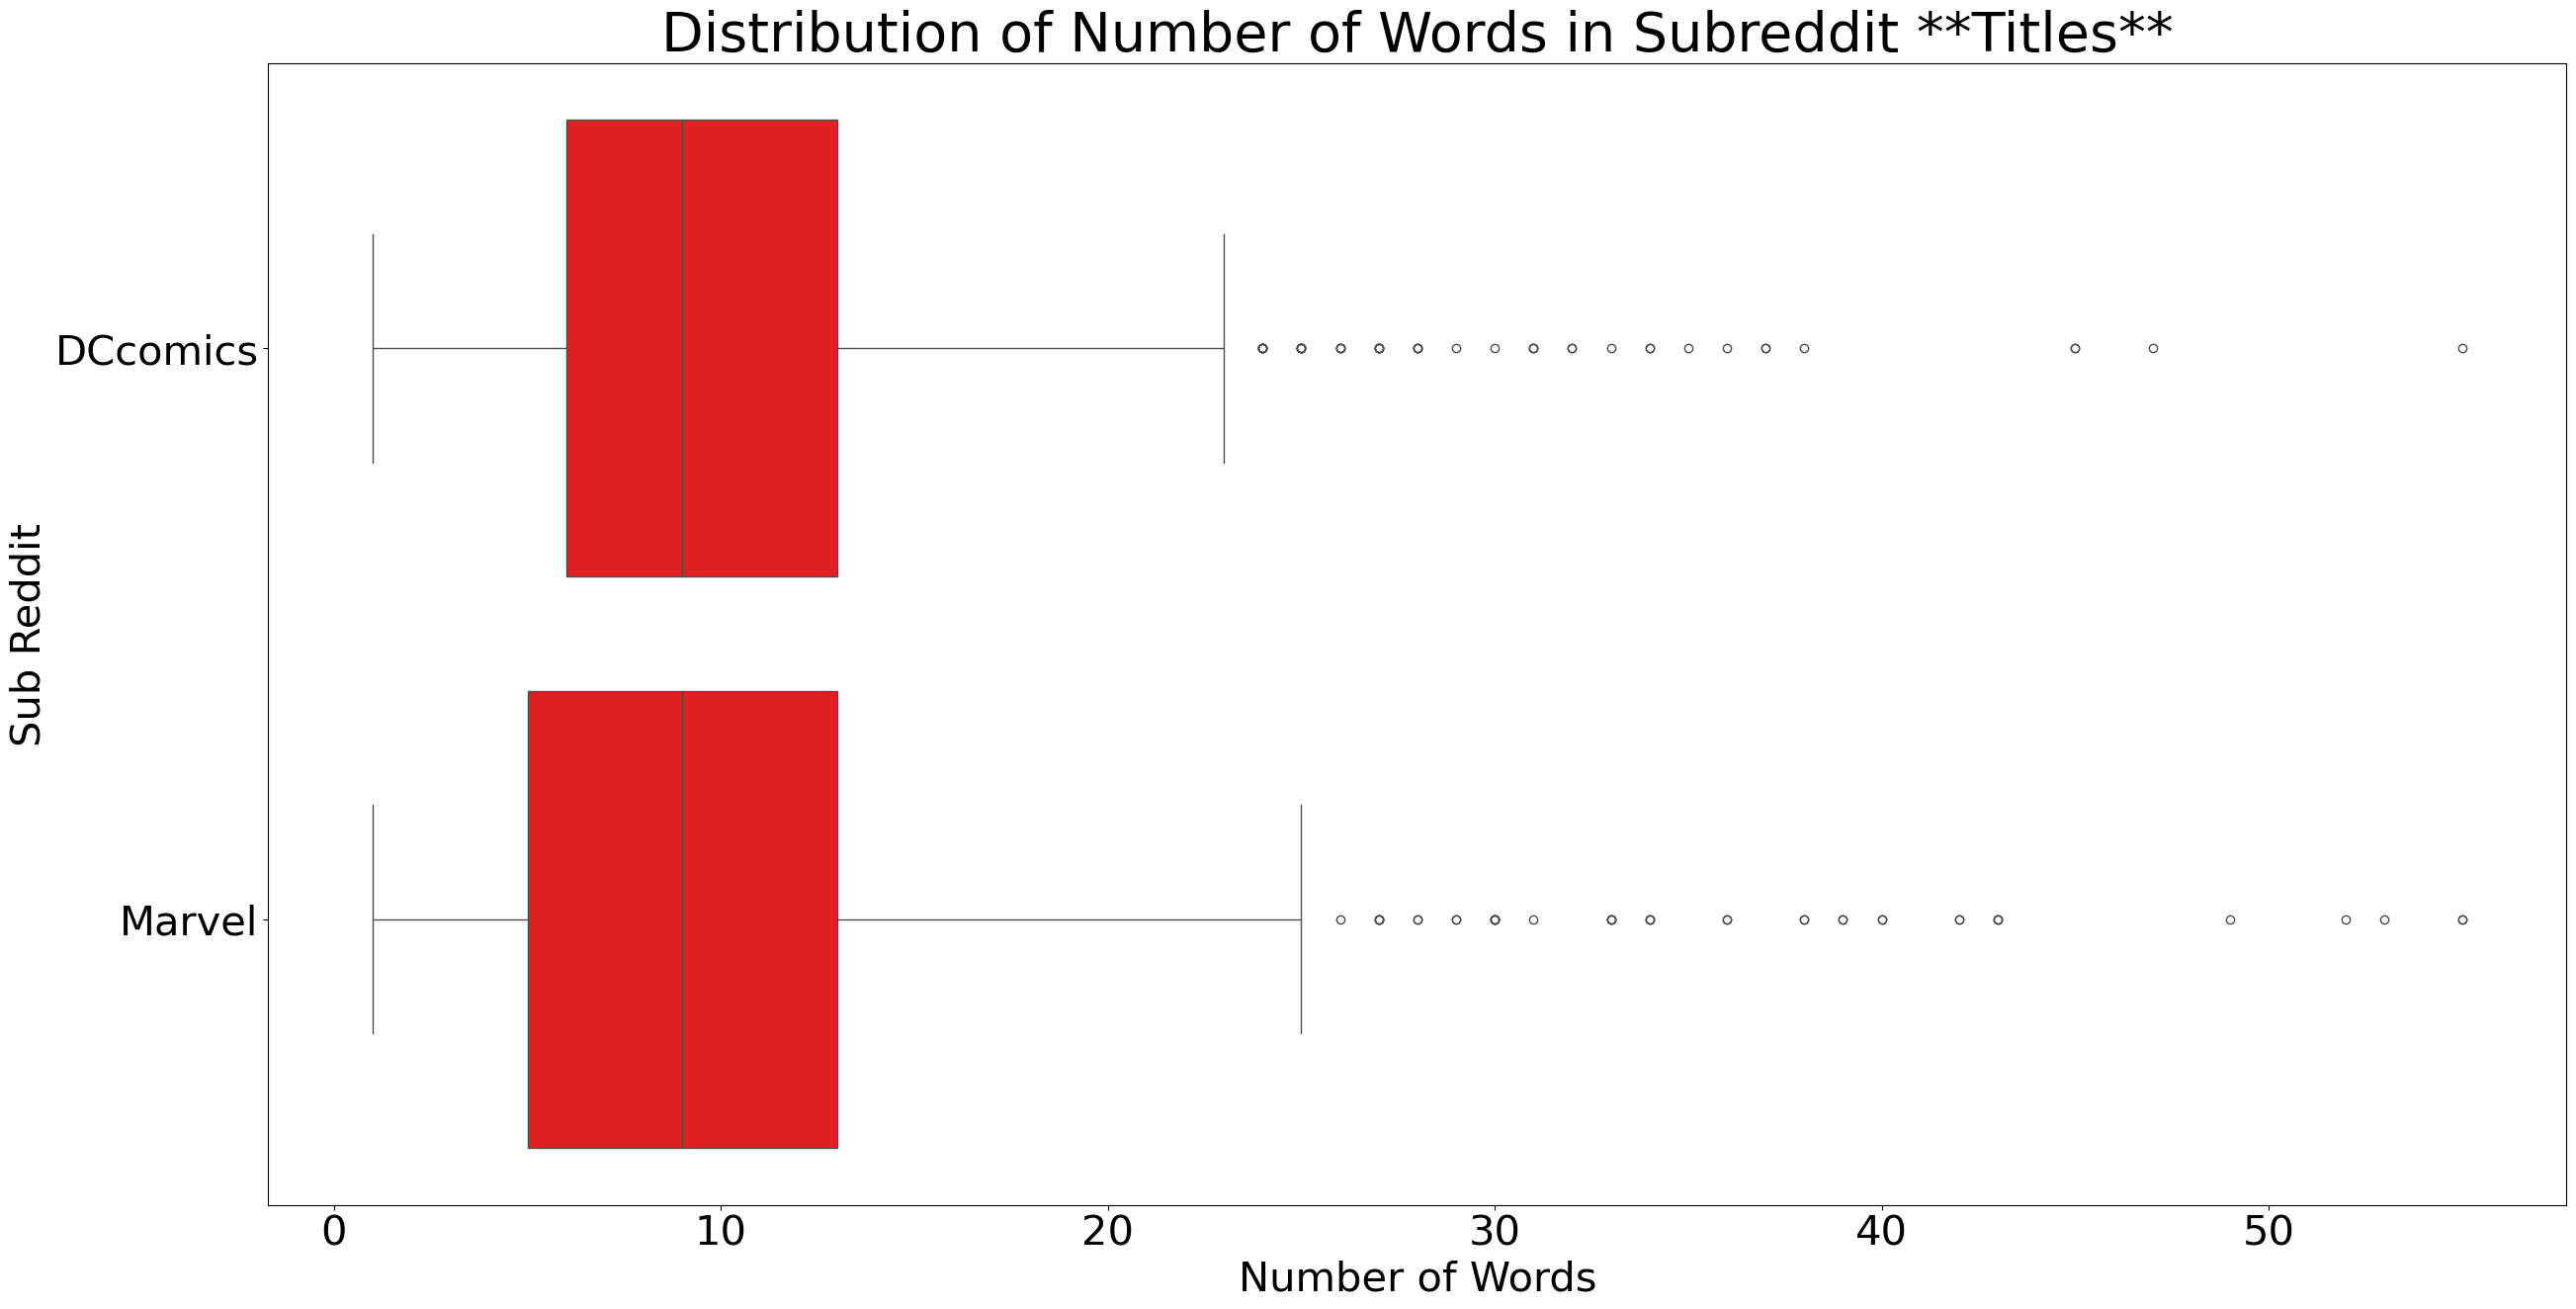

In [82]:
plt.figure(figsize = (30, 15))

sns.boxplot(x = df['title_word_count'],
            y = df['subreddit'], color = 'red')

plt.title('Distribution of Number of Words in Subreddit **Titles**', size = 40)
plt.xticks(size = 30)
plt.yticks(size = 30)
plt.xlabel('Number of Words', size = 30)
plt.ylabel('Sub Reddit', size = 30)

plt.savefig('../images/word_in_subreddit_titles.png', dpi = 192);

In [83]:
df.head()

,title,post,subreddit,up_votes,up_vote_ratio,clean_title,clean_post,clean_text,title_length,post_length,title_word_count,post_word_count,post_has_text
0,weekly discussion thread: ...,hey there honorary justice...,DCcomics,16,0.84,weekly discussion thread c...,hey there honorary justice...,weekly discussion thread c...,98,4827.0,17,355.0,1
1,dead boy detectives megath...,# [***dead boy detectives*...,DCcomics,12,0.80,dead boy detectives megath...,dead boy detectives \n\n t...,dead boy detectives megath...,30,1957.0,4,132.0,1
2,[comic excerpt] tim realiz...,NaN,DCcomics,470,0.96,comic excerpt tim realizes...,,comic excerpt tim realizes...,80,0.0,13,0.0,0
3,[comic excerpt] bros reall...,NaN,DCcomics,65,0.90,comic excerpt bros really ...,,comic excerpt bros really ...,119,0.0,20,0.0,0
4,[discussion] it’s donna tr...,artist: https://www.tumblr...,DCcomics,132,0.99,discussion it ’s donna tro...,artist,discussion it ’s donna tro...,69,86.0,10,2.0,1


In [86]:
df.to_csv('../datasets/cleaned_comics_data.csv', index = False)
    # Add index = False so when I reopen the data, I don't have to drop an index column